# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

The goal of this project is to perform unsupervised learning techniques to find patterns in the product selling, the customers spending behavior from a wholesale distributor. 

The project involves four main parts: Part 1) Exploratory data analysis and pre-processing, Part 2) KMeans clustering, Part 3) Hierarchical clustering, and Part 4) PCA.

# Data Information

The dataset is originally from the [UCI Wholesale customers Data Set](https://archive.ics.uci.edu/dataset/292/wholesale+customers). However, the categorical variables has been encoded to numerical values in the [Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set).

Additional Information:

| Variable            | Type          | Description                                                           | 
|---------------------|---------------|-----------------------------------------------------------------------| 
| Channel             | Nominal       | Customers' Channel - 1: Horeca (Hotel/Restaurant/Café) or 2: Retail channel |
| Region              | Nominal       | Customers' Region - 1: Lisbon, 2: Oporto, or 3: Other Region          |
| Fresh               | Continuous    | Annual spending (m.u.) on fresh products                              | 
| Milk                | Continuous    | Annual spending (m.u.) on milk products                               |
| Grocery             | Continuous    | Annual spending (m.u.) on grocery products                            | 
| Frozen              | Continuous    | Annual spending (m.u.) on frozen products                             | 
| Detergents_Paper    | Continuous    | Annual spending (m.u.) on detergents and paper products               | 
| Delicassen          | Continuous    | Annual spending (m.u.) on delicatessen products                       |

# Part I : EDA - Exploratory Data Analysis & Pre-processing

----------

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- **Data Import**: Import the dataset into a statistical software tool such as Python or R.
- **Data Cleaning**: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- **Data Description**: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- **Data Visualization**: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- **Outlier Detection**: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- **Correlation Analysis**: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- **Data Transformation**: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- **Feature Selection**: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

Our goal of the Exploratory Data Analysis is to explore the data, to gain understanding about the provided diabetes datasets by using visualizations, summary statistics, and finally data prepprocessing & transformation to prepare the data for unsupervised learning models (KMeans Clustering, Hierarchical Clustering, PCA).

In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_theme()

### 1. Data Import

In [2]:
# Load the dataset and save in 'wholesale_df'
wholesale_df = pd.read_csv(r'Wholesale_Data.csv')

# Load the first 5 rows of the dataframe
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# The dimensions of the dataframe - Number of rows and columns
wholesale_df.shape

(440, 8)

In [4]:
# Print information about the 'diabetes_df' DataFrame
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### 2. Data Description

In [5]:
# Statistics summary
wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


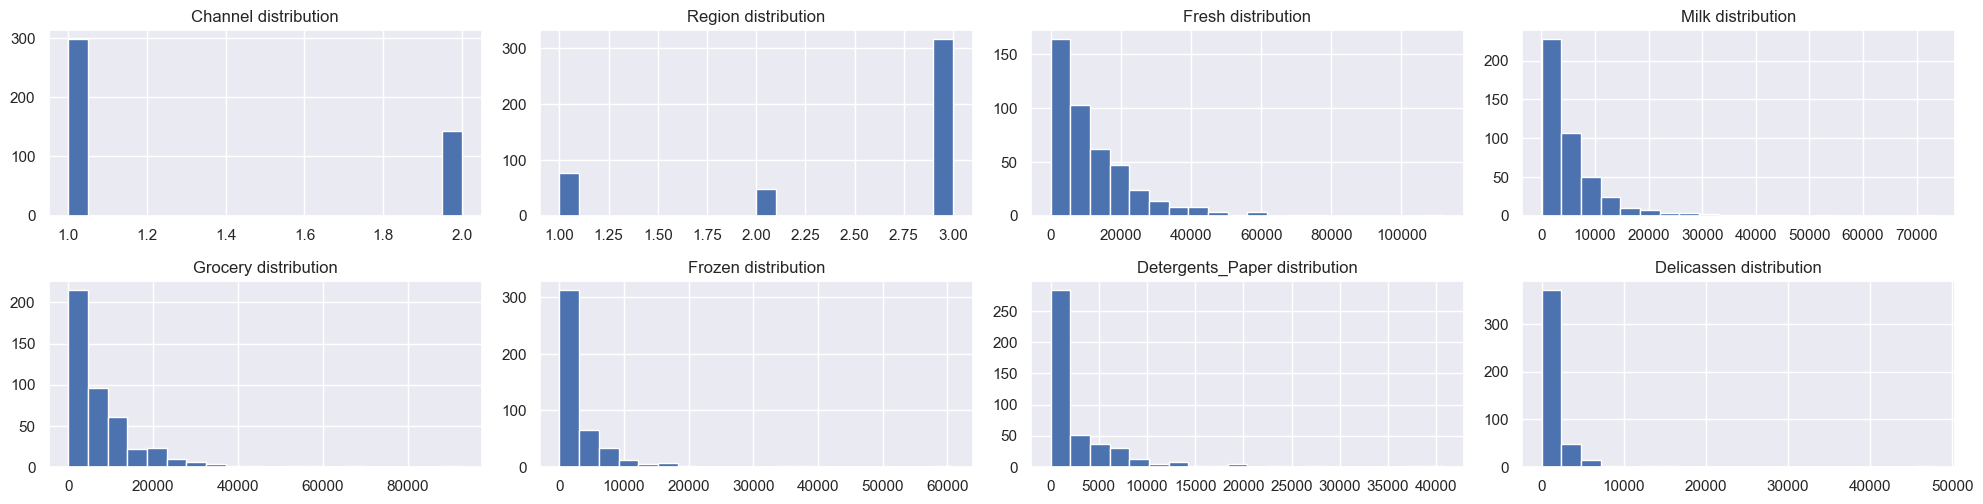

In [6]:
# Plot the histograms for all columns
def draw_histograms(dataframe, features, rows, cols):
    
    fig = plt.figure(figsize=(20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax)
        ax.set_title(feature+' distribution')
    
    fig.tight_layout()
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.show()

draw_histograms(wholesale_df, wholesale_df.columns, 8, 4)

Some observations from the distributions of all variables:

* **Channel**: Most of the data is concentrated around the value 1, suggesting a majority of customers belong to the Horeca (Hotel/Restaurant/Café) channel. The Retail channel (thoe with the value 2) is significantly less common than the Horeca wholesale channel. HORECA is an acronym for Hotels, Restaurants and Catering ([Source](https://www.researchgate.net/figure/Customers-and-suppliers-of-wholesalers-Notes-HORECA-stands-for-Hotels-Restaurants-and_fig2_328286663#:~:text=Notes%3A%20HORECA%20stands%20for%20Hotels%2C%20Restaurants%20and%20Catering.)). It refers to the B2B customer base of wholesalers, distributing mass consumption goods to the hospitality industry/hotel and food and beverage industries; as opposed to the Retail client base ([Source](http://www.stridon.hr/en/distribution/horeca-5)).

* **Region**: The majority of the data is centered around the value of 3, which is an aggregation of "Other Region" of that country. It doesn't provide further details about which cities/locations contribute to such a density of wholesale customers in whole. The context of this wholesaler data set seemingly takes place at Portugal with regions like 'Lisnon', 'Oporto'? Portugal has its [two largest cities (Lisbon, Porto)](https://www.statista.com/statistics/372144/largest-cities-in-portugal/) that seems matching ere, but we'll go ahead with only the assumption that 'Lisnon', 'Oporto' might be the largest cities/regions respectively in our studying country. There are smaller concentrations around the values of 1 (Lisnon) and 2 (Oporto), but they have fewer customers compared to the rest of the regions combined.

* **Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen**: The distributions of those numerical columns which indicate the annual spending of those product categories are right skewed, indicating that the majority of customers in the dataset have low to moderate spending. There are also a few outliers in such columns which represents a few customers (outliers) who spend a lot.

* The distributions for Channel and Region suggest categoric nature of the data where customers are primarily grouped in one channel or region, with fewer in the other categories.

### 3. Data Cleaning

In [7]:
# There's no missing values
wholesale_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
# There's no duplicated rows
wholesale_df.duplicated().sum()

0

### 4. Data Visualization & Exporation

#### * Are there more Horeca or more Retail customers for this wholesaler?

The count of customers per each channel type: 
 1    298
2    142
Name: Channel, dtype: int64

The percentage of customers per each channel type: 
 1    67.727273
2    32.272727
Name: Channel, dtype: float64


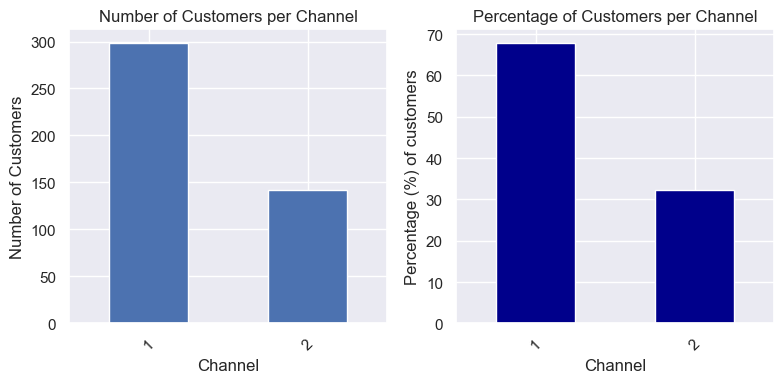

In [9]:
# Calculate actual numbers of customers per each channel type
channel_counts = wholesale_df['Channel'].value_counts().sort_values(ascending=False)
print('The count of customers per each channel type: \n', channel_counts)

# Calculate percentages of customers per each channel type
channel_perc = wholesale_df['Channel'].value_counts(normalize=True).sort_values(ascending=False) * 100
print('\nThe percentage of customers per each channel type: \n', channel_perc)

# Plot actual numbers of customers per each channel type
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
channel_counts.plot(kind='bar')
plt.title('Number of Customers per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Plot percentages of customers per each channel type
plt.subplot(1, 2, 2)
channel_perc.plot(kind='bar', color='darkblue')
plt.title('Percentage of Customers per Channel')
plt.xlabel('Channel')
plt.ylabel('Percentage (%) of customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Almost 68% of the customers of this wholesaler are from Horeca places (hotels, restaurants, cafes and shops), whereas only 32% are Retail customers.

#### * How are the customers of this wholesaler distributed across the regions?

The count of customers per each region: 
 1    298
2    142
Name: Channel, dtype: int64

The percentage of customers per each region: 
 3    71.818182
1    17.500000
2    10.681818
Name: Region, dtype: float64


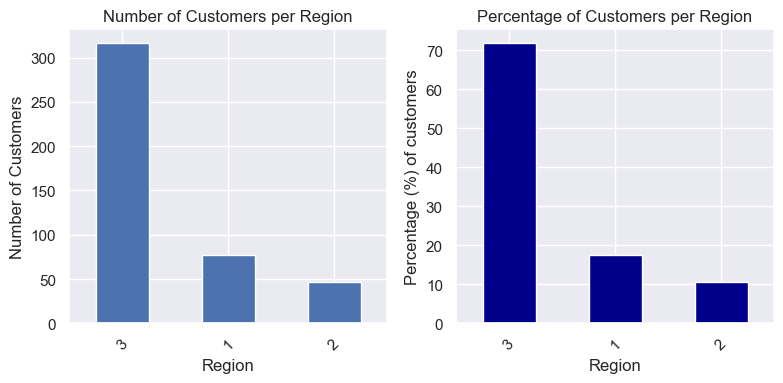

In [10]:
# Calculate actual numbers of customers per each region
region_counts = wholesale_df['Region'].value_counts().sort_values(ascending=False)
print('The count of customers per each region: \n', channel_counts)

# Calculate percentages of customers per each region
region_perc = wholesale_df['Region'].value_counts(normalize=True).sort_values(ascending=False) * 100
print('\nThe percentage of customers per each region: \n', region_perc)

# Plot actual numbers of customers per each region
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
region_counts.plot(kind='bar')
plt.title('Number of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Plot percentages of customers per each channel type
plt.subplot(1, 2, 2)
region_perc.plot(kind='bar', color='darkblue')
plt.title('Percentage of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Percentage (%) of customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

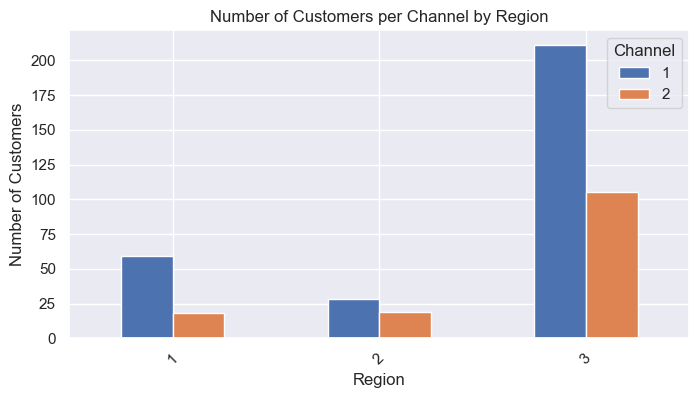

In [11]:
# Group by 'Channel' and 'Region' and count the number of customers
channel_region_counts = wholesale_df.groupby(['Channel', 'Region']).size().unstack()

# Plot the counts of customers per 'Channel' by 'Region'
channel_region_counts.T.plot(kind='bar', figsize=(8, 4))
plt.title('Number of Customers per Channel by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()

The majority of customers, estimated at 72% the customer base of this wholesaler are densely located in Region 3 - 'Other Region' for both Horeca and Retail custommers. There are much more Horeca customers in Lisnon than in Operto.

#### * Are there any difefrences between the spending patterns from Horeca or more Retail customers across the product categories?

In [12]:
# Separate the Horeca customer channel in a variable for data exploration
horeca_channel = wholesale_df.loc[wholesale_df['Channel'] == 1].reset_index(drop=True)

# Calculate a new column 'Total_Spend' across all product categories
horeca_channel['Total_Spend'] = horeca_channel[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

horeca_channel

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend
0,1,3,13265,1196,4221,6404,507,1788,27381
1,1,3,5963,3648,6192,425,1716,750,18694
2,1,3,10253,1114,3821,397,964,412,16961
3,1,3,5876,6157,2933,839,370,4478,20653
4,1,3,7780,2495,9464,669,2518,501,23427
...,...,...,...,...,...,...,...,...,...
293,1,3,16731,3922,7994,688,2371,838,32544
294,1,3,29703,12051,16027,13135,182,2204,73302
295,1,3,39228,1431,764,4510,93,2346,48372
296,1,3,10290,1981,2232,1038,168,2125,17834


In [13]:
# Separate the Retail customer channel in a variable for data exploration
retail_channel = wholesale_df.loc[wholesale_df['Channel'] == 2].reset_index(drop=True)

# Calculate a new column 'Total_Spend' across all product categories
retail_channel['Total_Spend'] = retail_channel[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

retail_channel

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,2,3,22615,5410,7198,3915,1777,5185,46100
4,2,3,9413,8259,5126,666,1795,1451,26710
...,...,...,...,...,...,...,...,...,...
137,2,3,660,8494,18622,133,6740,776,35425
138,2,3,17063,4847,9053,1031,3415,1784,37193
139,2,3,17565,3686,4657,1059,1803,668,29438
140,2,3,16980,2884,12232,874,3213,249,36432


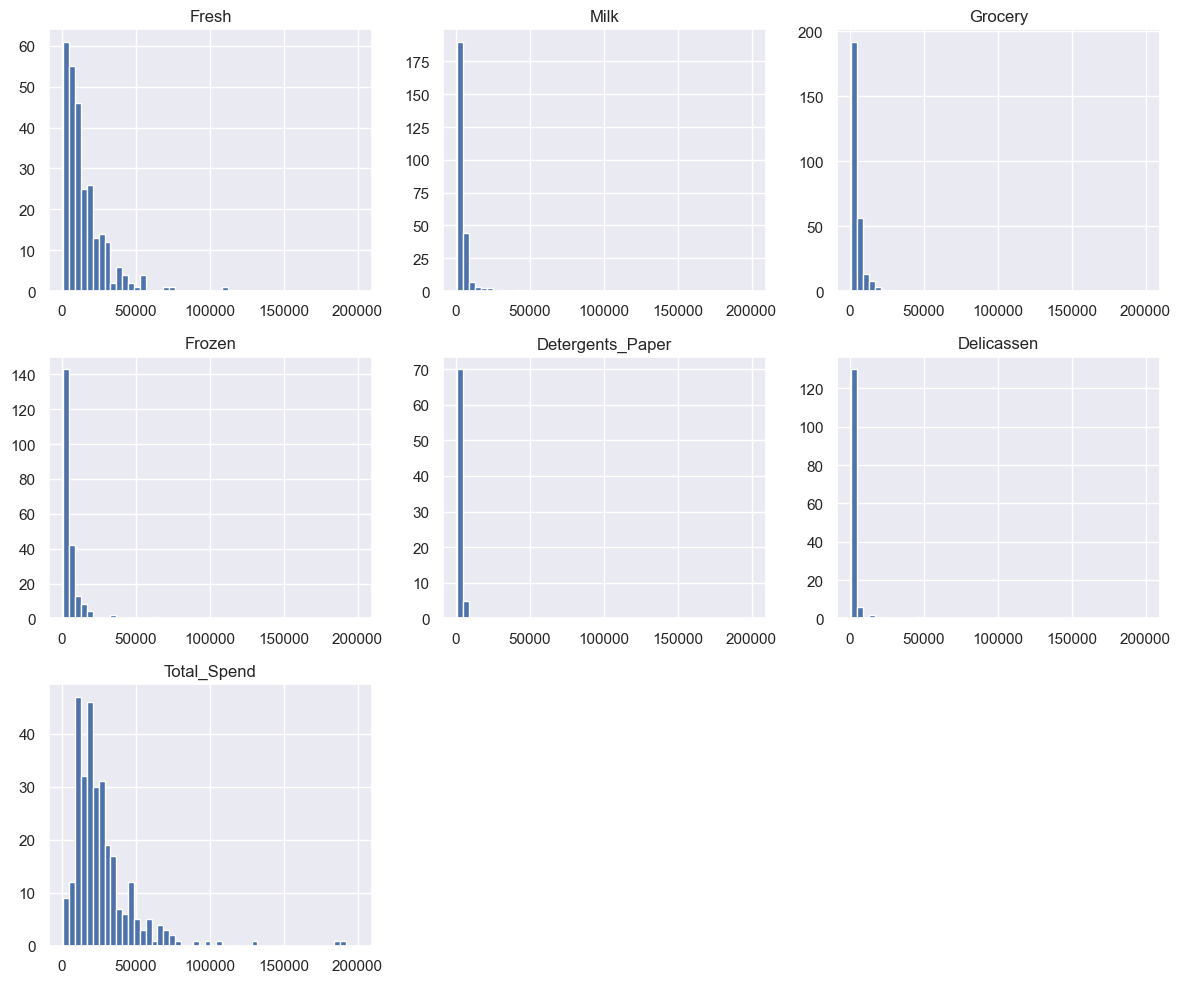

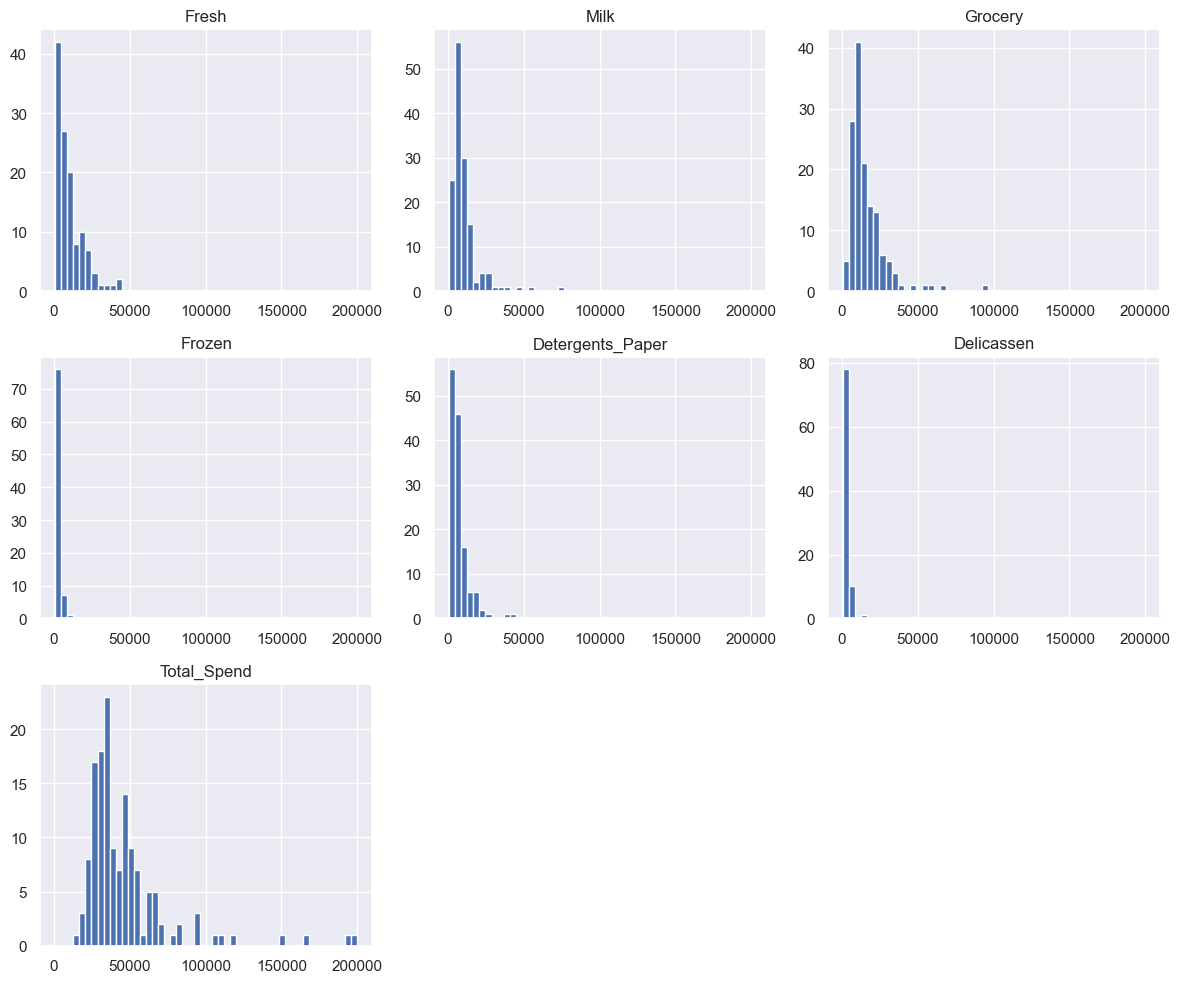

In [14]:
# Determine global min and max for each shared column of the 'horeca_channel' and 'retail_channel' dataframes to compare the spending behaviors
# Except for categorical columns: 'Channel', 'Region'
cols = horeca_channel.drop(columns=['Channel', 'Region']).columns
xlims = {}

for feature in cols:
    global_min = np.min([horeca_channel[feature].min(), retail_channel[feature].min()])
    global_max = np.max([horeca_channel[feature].max(), retail_channel[feature].max()])
    xlims[feature] = (global_min, global_max)

# Plot horeca_channel annual spending across product categories with global axis limits
horeca_channel.drop(columns=['Channel', 'Region']).hist(figsize=(12, 10), bins=50, range=xlims[feature])

plt.tight_layout()
plt.show()

# Plot retail_channel pending across product categories with global axis limits
retail_channel.drop(columns=['Channel', 'Region']).hist(figsize=(12, 10), bins=50, range=xlims[feature])

plt.tight_layout()
plt.show()


In [15]:
horeca_channel['Total_Spend'].describe()

count       298.000000
mean      26844.191275
std       22164.839073
min         904.000000
25%       13859.250000
50%       21254.500000
75%       32113.750000
max      190169.000000
Name: Total_Spend, dtype: float64

In [16]:
retail_channel['Total_Spend'].describe()

count       142.000000
mean      46619.232394
std       29346.866491
min       14993.000000
25%       30147.250000
50%       37139.000000
75%       51650.500000
max      199891.000000
Name: Total_Spend, dtype: float64

Based on the histograms from both the horeca and retail channels, we have some observations:

* Although nearly 68% of customers are from Horeca, their average annual spend for all categories is just $26,844 (assuming the spend is in dollars). Retail customers accounts for only 32% of the total number of customers, yet their average yearly spend is $46,619.
* Retail customers tend to spend more on Milk, Groceries and Detergents_paper compared to Horeca customers.
* Both channels see similar overall spending patterns for the rest of the categories, despite Horeca customers slightly spend more on food-related categories such as: Fresh produce and Frozen products.
* The repeated pattern of extreme outliers who tend to spend more than normal customers.

### 5. Outlier Dectection & Handling

As we found out above that there are cases where customers' spendings are extremely out of the norm and driving our distributions highly skewed to the right. They exist in small numbers and valid, yet their spendings are many times more than normal. We'll need to dectect and deal with those outlier instances because they may severely impact our models at a latter point.

In [17]:
# Select only columns with numeric data types
numeric_cols = wholesale_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].columns.tolist()
print(numeric_cols)

# Select only columns with categorical data types
cat_cols = wholesale_df[['Channel', 'Region']].columns.tolist()
print(cat_cols)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
['Channel', 'Region']


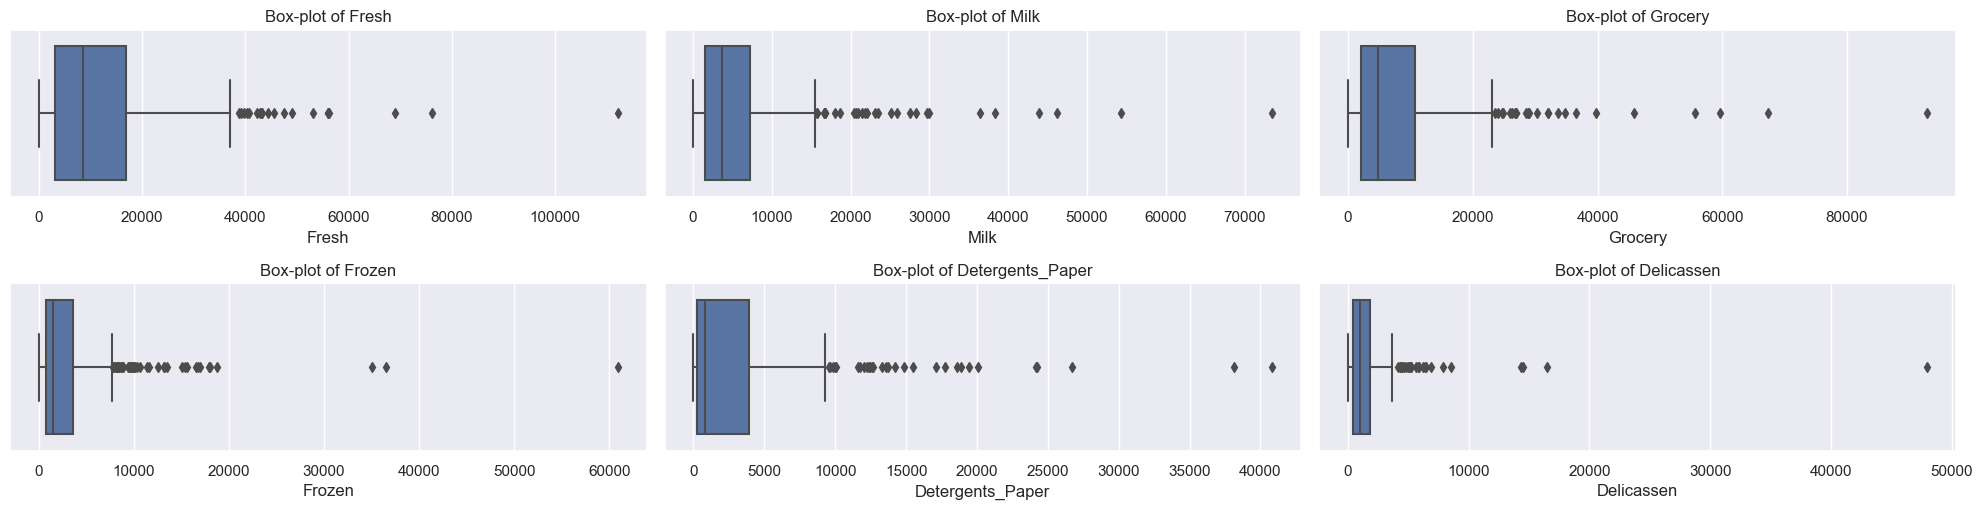

In [18]:
# Plot the boxplots for numeric columns to dectect outliers
def draw_boxplot(dataframe, features, rows, cols):
    
    fig = plt.figure(figsize=(20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        sns.boxplot(data=dataframe, x=dataframe[feature])
        ax.set_title('Box-plot of '+ feature)
    
    fig.tight_layout()
    plt.show()

# Exclude the categorical 'Channel', 'Region' columns from the columns list
draw_boxplot(wholesale_df, wholesale_df[numeric_cols], 8, 3)

In [19]:
# Check the current dimension of wholesale_df before treating the outliers
wholesale_df.shape

(440, 8)

In [20]:
# Function to remove outliers out of the Z-score range
def remove_outliers(dataframe, col):

    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]

# Applying the function on each column, excluding the categorical 'Channel', 'Region' columns
for col in wholesale_df[numeric_cols].columns:
    wholesale_df = remove_outliers(wholesale_df, col)

# View 'wholesale_df' after removing the outliers that are out of the Z-score range
wholesale_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [21]:
# Drop duplicated rows, if any at this point
wholesale_df.drop_duplicates(inplace=True)

In [22]:
# Check again the current shape of wholesale_df after treating the outliers
wholesale_df.shape

(318, 8)

### 6. Correlation Analysis

Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not by using the correlation matrix.

In [23]:
# Use the corr() method to find the pairwise correlation of all columns
wholesale_df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.145904,-0.083583,0.616291,0.708853,-0.180617,0.772343,0.202762
Region,0.145904,1.000000,-0.006608,0.099850,0.102724,-0.075077,0.099916,0.092540
Fresh,-0.083583,-0.006608,1.000000,-0.056104,-0.064819,0.200101,-0.202086,0.211049
Milk,0.616291,0.099850,-0.056104,1.000000,0.736872,-0.165518,0.685531,0.290687
Grocery,0.708853,0.102724,-0.064819,0.736872,1.000000,-0.201720,0.845943,0.272322
Frozen,-0.180617,-0.075077,0.200101,-0.165518,-0.201720,1.000000,-0.185918,0.075176
Detergents_Paper,0.772343,0.099916,-0.202086,0.685531,0.845943,-0.185918,1.000000,0.163153
Delicassen,0.202762,0.092540,0.211049,0.290687,0.272322,0.075176,0.163153,1.000000


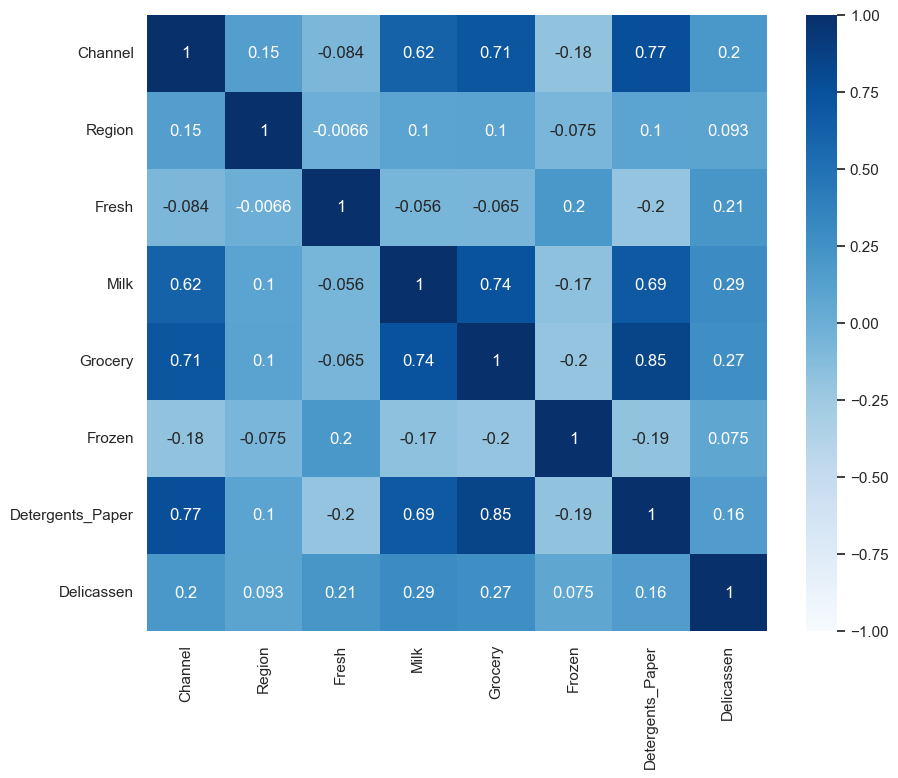

In [24]:
# Use a correlation matrix heatmap to check the relationship between the different variables
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(wholesale_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()

Some significant correlation observations:

* **Channel and Grocery**: The correlation is 0.71, suggesting a strong positive linear relationship between 'Channel' and 'Grocery'.

* **Channel and Detergents_Paper**: A correlation of 0.77 indicates an even stronger positive linear relationship between 'Channel' and 'Detergents_Paper', compared to Grocery.

* **Channel and Milk**: A correlation of 0.62 indicates a moderate positive linear relationship between 'Channel' and 'Milk'.

* **Milk and Grocery**: The correlation is 0.74, indicating a strong positive relationship.

* **Milk and Detergents_Paper**: The correlation is 0.69, indicating a moderately strong positive relationship.

* **Grocery and Detergents_Paper**: With a correlation of 0.85, this is one of the strongest positive linear relationship.

### 7. Feature Selection:

Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

Some unsupervised machine learning models can be sensitive to multicollinearity (for example: K-means as mentioned [here](https://stats.stackexchange.com/questions/359905/will-collinearity-be-a-problem-for-k-nearest-neigbor)), while PCA seems to be able to handle multicollinearity as mentioned [here](https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b#:~:text=PCA%20(Principal%20Component%20Analysis)%20takes,effectively%20eliminate%20multicollinearity%20between%20features).

Thus, we'll prepare two sets of features for modeling and output comparison: 1) the dataset with all features as is (X), and 2) a selected dataset remove highly correlated pairs out of the model to improve performance (X_selected). 

In [25]:
# Copy 'wholesale_df' into the X features set
X = wholesale_df.copy()
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [26]:
# Copy 'wholesale_df' into another X_selected features set. We can do feature selection on this set.
X_selected = wholesale_df.copy()
X_selected

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


Since 'Channel' exhibits a moderate to strong linear correlation relationship with a couple of other features ('Detergents_Paper, Grocery, Milk'), it is a candidate to be removed from our feature lists in X_selected. This column is a less interpretable categorical variable with just 2 unique values (1 for Horeca channel, 2 for Retail channel) which presents a lesser variance.

In [27]:
X_selected = X_selected.drop(columns=['Channel'])
X_selected

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
3,3,13265,1196,4221,6404,507,1788
5,3,9413,8259,5126,666,1795,1451
6,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...
432,3,21117,1162,4754,269,1328,395
433,3,1982,3218,1493,1541,356,1449
434,3,16731,3922,7994,688,2371,838
438,3,10290,1981,2232,1038,168,2125


Next, let's find out the number of unique values among 'Milk, Grocery, Detergents_Paper' - the 3 significantly correlated feature combinations to consider which column to drop based on the lesser variance ground.

In [28]:
X_selected.Milk.nunique()

303

In [29]:
X_selected.Grocery.nunique()

313

In [30]:
X.Detergents_Paper.nunique()

306

The number of unique values among those 3 variables aren't too far off from each other. Let's come back to the ultimate "bottom line" our wholesaling dataset, we would want to increase the customers' spending much as using machine learning techniques to explore undiscovered data patterns about the customers. All these numeric features share the same measure in the form of annual spending in monetary units.

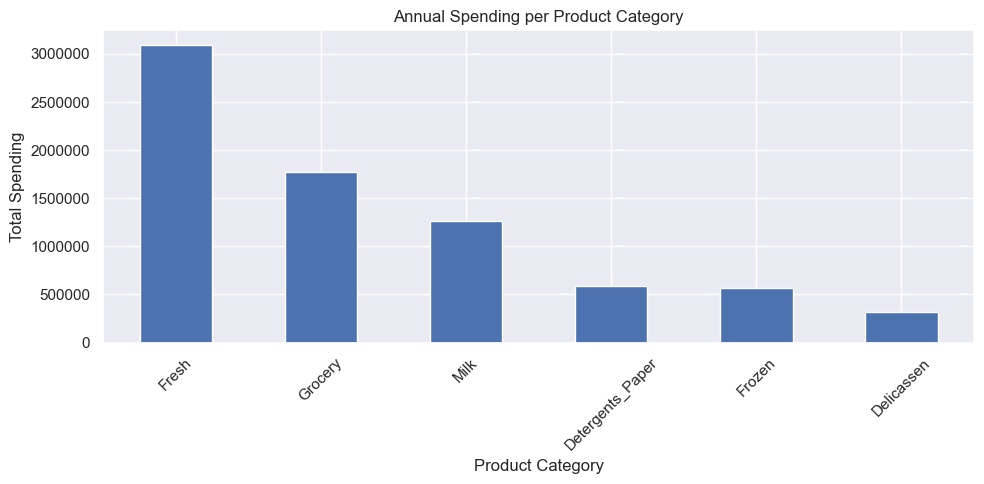

In [31]:
# Calculate the sum of annual spending per each product category
category_sums = X[numeric_cols].sum().sort_values(ascending=False)

# Plot the sum of annual spending per each product category
plt.figure(figsize=(10, 5))
category_sums.plot(kind='bar')
plt.title('Annual Spending per Product Category')
plt.ylabel('Total Spending')
plt.xlabel('Product Category')

# Reset y-axis formatter to ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')  # This will remove scientific notation
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Thus, if we have to choose an optimal method to get rid of one feature among the 'Milk and Grocery', 'Milk and Detergents_Paper' and 'Grocery and Detergents_Paper' pairs, it's probably best to remove 'Detergents_Paper' first due to a low annual spend.

Between 'Milk and Grocery', usually milk is listed as a grocery item. We can consider to drop also 'Milk' from X_selected, due to its being correlated at 0.74 with 'Grocery'. Before we do that, we can try a tree-based algorithm like Random Forest to rank features based on their importance. While this method are traditionally used for supervised learning, it can provide insights into which features contribute the most to the variance or structure of the data. Even though there's no target variable, the model is used on its own train data to get feature importances.

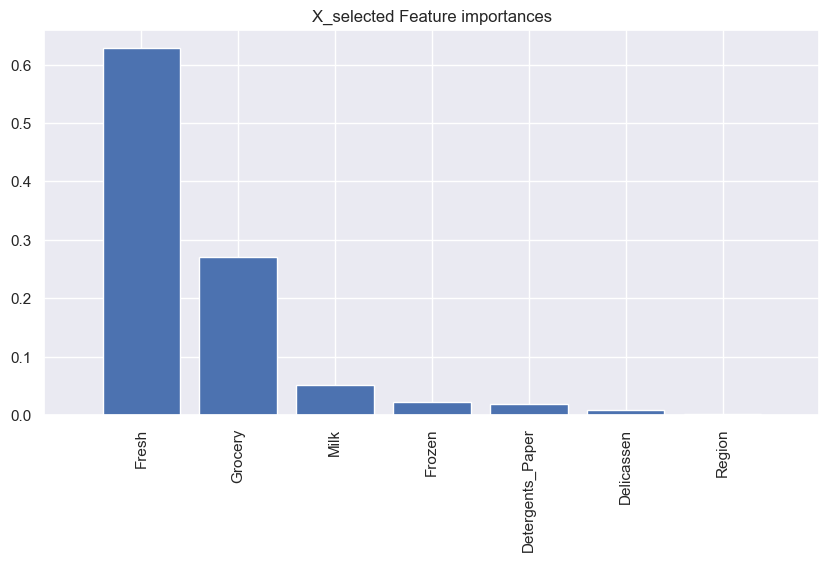

In [32]:
# Fit RandomForest to find feature imporance on X_selected
model = RandomForestRegressor(n_estimators=100)
model.fit(X_selected, X_selected)

# Get feature importances of X_selected
importances = model.feature_importances_

# Plot feature importances of X_selected
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title('X_selected Feature importances')
plt.bar(range(X_selected.shape[1]), importances[indices], align='center')
plt.xticks(range(X_selected.shape[1]), X_selected.columns[indices], rotation=90)
plt.xlim([-1, X_selected.shape[1]])
plt.show()

'Milk' is much less of an importance (<0.1) than the leading two features: 'Fresh' and 'Grocery', let's drop it from 'X_selected'.

In [33]:
# Seperate a 'X_selected' features set without the 'Detergents_Pape' and 'Milk' columns
X_selected = X_selected.drop(columns=['Detergents_Paper', 'Milk'])
X_selected

,Region,Fresh,Grocery,Frozen,Delicassen
0,3,12669,7561,214,1338
1,3,7057,9568,1762,1776
3,3,13265,4221,6404,1788
5,3,9413,5126,666,1451
6,3,12126,6975,480,545
...,...,...,...,...,...
432,3,21117,4754,269,395
433,3,1982,1493,1541,1449
434,3,16731,7994,688,838
438,3,10290,2232,1038,2125


In [34]:
# The shape of the full features set at this point
X.shape

(318, 8)

In [35]:
# The shape of the selected features set at this point
X_selected.shape

(318, 5)

### 8. Data Transformation:

* Build a pipeline for data transformation with log transformation and StandardScaler, as the numeric data are highly skewed: [Reference](https://stats.stackexchange.com/questions/402470/how-can-i-use-scaling-and-log-transforming-together)

In [36]:
# Transformation pipeline fitting on X - the full feature datasets

# Define the log transformation we want as a function
def log_transform(X1):
    X1_log = np.log(X1)
    return X1_log

# Wrap the function inside a FunctionTransformer.
# This variable can now be used in a pipeline.
log_transform_object = FunctionTransformer(log_transform)

# Define the pipeline for numeric columns
numeric_cols_pipeline = Pipeline(steps=[('log_transform', log_transform_object),
                                        ('scaling', StandardScaler())
                                        ])

# Define the column transformer
preprocessor = ColumnTransformer(transformers=[
                                        ('cat', 'passthrough', ['Channel', 'Region']),
                                        ('num', numeric_cols_pipeline, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
                                        ])

# Fit the column transformer to X
preprocessor.fit(X)

ColumnTransformer(transformers=[('cat', 'passthrough', ['Channel', 'Region']),
                                ('num',
                                 Pipeline(steps=[('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x00000224A1CC4900>)),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['Fresh', 'Milk', 'Grocery', 'Frozen',
                                  'Detergents_Paper', 'Delicassen'])])

In [37]:
# Review the numeric columns names set in the 'numeric_cols' variable
print(numeric_cols)

# Set the categorical columns names set in the 'cat_cols' variable
cat_cols = ['Channel', 'Region']
print(cat_cols)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
['Channel', 'Region']


In [38]:
# Reassign the transformed data into 'X'
X = pd.DataFrame(preprocessor.transform(X), columns=(cat_cols + numeric_cols))
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,0.601703,1.311573,0.690419,-1.470955,0.828516,0.641018
1,2.0,3.0,0.167531,1.327836,0.918508,0.413627,0.955926,0.881540
2,1.0,3.0,0.635813,-0.835228,0.125643,1.567203,-0.188949,0.887260
3,2.0,3.0,0.381280,1.150942,0.313847,-0.456079,0.584634,0.709880
4,2.0,3.0,0.569198,0.176045,0.612261,-0.748840,0.926815,-0.121811
...,...,...,...,...,...,...,...,...
313,1.0,3.0,0.980805,-0.864872,0.240854,-1.266485,0.400252,-0.395213
314,1.0,3.0,-0.774743,0.182132,-0.881274,0.293826,-0.405302,0.708708
315,1.0,3.0,0.808056,0.385487,0.744373,-0.427027,0.754928,0.243602
316,1.0,3.0,0.447378,-0.316546,-0.491687,-0.059393,-0.864812,1.033918


In [39]:
# Transformation pipeline fiting on 'X_selected' - the selected feature datasets

# Define the log transformation we want as a function
def log_transform(X2):
    X2_log = np.log(X2)
    return X2_log

# Wrap the function inside a FunctionTransformer.
# This variable can now be used in a pipeline.
log_transform_object2 = FunctionTransformer(log_transform)

# Define the pipeline for numeric columns
numeric_cols_pipeline2 = Pipeline(steps=[('log_transform', log_transform_object),
                                        ('scaling', StandardScaler())
                                        ])

# Define the column transformer
preprocessor2 = ColumnTransformer(transformers=[
                                        ('cat', 'passthrough', ['Region']),
                                        ('num', numeric_cols_pipeline, ['Fresh', 'Grocery', 'Frozen', 'Delicassen'])
                                        ])

# Fit the column transformer to X_selected
preprocessor2.fit(X_selected)

ColumnTransformer(transformers=[('cat', 'passthrough', ['Region']),
                                ('num',
                                 Pipeline(steps=[('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x00000224A1CC4900>)),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['Fresh', 'Grocery', 'Frozen', 'Delicassen'])])

In [40]:
# Reassign the transformed data into 'X_selected'
X_selected = pd.DataFrame(preprocessor2.transform(X_selected), columns=(['Region']+ ['Fresh', 'Grocery', 'Frozen', 'Delicassen']))
X_selected

,Region,Fresh,Grocery,Frozen,Delicassen
0,3.0,0.601703,0.690419,-1.470955,0.641018
1,3.0,0.167531,0.918508,0.413627,0.881540
2,3.0,0.635813,0.125643,1.567203,0.887260
3,3.0,0.381280,0.313847,-0.456079,0.709880
4,3.0,0.569198,0.612261,-0.748840,-0.121811
...,...,...,...,...,...
313,3.0,0.980805,0.240854,-1.266485,-0.395213
314,3.0,-0.774743,-0.881274,0.293826,0.708708
315,3.0,0.808056,0.744373,-0.427027,0.243602
316,3.0,0.447378,-0.491687,-0.059393,1.033918


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

--------------

* Use the Elbow method for finding the optimal number of clusters in K-Means ([Reference](https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/)):

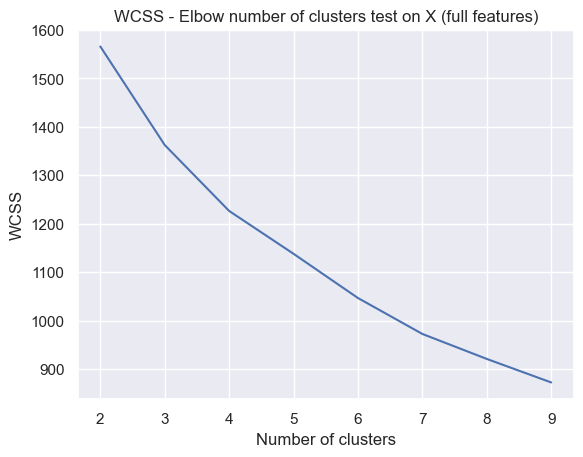

In [41]:
# On the 'X' full feature set:

# Using the elbow method to find the optimal number of clusters elbow = [] for i in range(2, 10) on the X full feature set:
elbow_wcss = []

for i in range(2, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    elbow_wcss.append(kmeans.inertia_)

# Plot the WCSS - Within-Cluster Sum of Square distances inside the cluster to find a number of clusters which minimizes WCSS
plt.plot(range(2, 10), elbow_wcss)
plt.title('WCSS - Elbow number of clusters test on X (full features)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

The elbow point - the point at which the elbow shape is created seems to be at 7 for X; or our K value or an optimal number of clusters is 7 in other words. We can train the model on the X - full features input data with a number of clusters of 7.

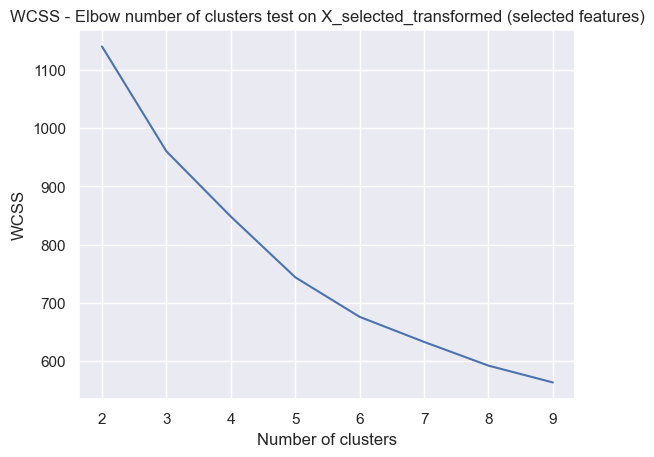

In [42]:
# On the 'X_selected' with selected features set:

# Using the elbow method to find the optimal number of clusters elbow = [] for i in range(2, 10) on the 'X_selected' with selected features set:
elbow_wcss_selected = [] 

for i in range(2, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_selected) 
    elbow_wcss_selected.append(kmeans.inertia_)

# Plot the WCSS - Within-Cluster Sum of Square distances inside the cluster to find a number of clusters which minimizes WCSS
plt.plot(range(2, 10), elbow_wcss_selected)
plt.title('WCSS - Elbow number of clusters test on X_selected_transformed (selected features)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

The elbow point seems to be at 6 for X_selected, compared to 7 for X.

* Training the model on X (the full features) with the number of clusters = 7:

In [43]:
# Run K-means model on the 'X' full feature set with n_clusters = 7:
kmeans1 = KMeans(n_clusters = 7, init = "k-means++", random_state = 42)
kmeans1.fit(X)

KMeans(n_clusters=7, random_state=42)

In [44]:
kmeans1.inertia_

972.4767425788267

In [45]:
# Save the predicted cluster labels of X into a variable
pred1_cluster_labels_k = kmeans1.predict(X)
pred1_cluster_labels_k

array([5, 2, 6, 2, 2, 2, 3, 2, 2, 6, 2, 2, 2, 3, 5, 2, 2, 2, 6, 5, 6, 3,
       2, 3, 3, 6, 3, 5, 2, 5, 2, 5, 5, 2, 6, 5, 5, 6, 2, 5, 3, 5, 5, 2,
       2, 6, 4, 2, 2, 3, 2, 0, 6, 3, 3, 5, 2, 6, 2, 6, 6, 5, 4, 4, 0, 0,
       6, 2, 2, 2, 3, 3, 5, 5, 6, 2, 6, 6, 6, 6, 3, 6, 6, 6, 6, 0, 2, 6,
       2, 4, 6, 0, 3, 3, 3, 6, 2, 4, 3, 3, 2, 3, 6, 3, 3, 3, 6, 6, 3, 3,
       6, 3, 0, 5, 6, 2, 5, 2, 0, 6, 2, 2, 3, 0, 6, 5, 5, 3, 5, 3, 3, 6,
       2, 5, 4, 6, 6, 4, 2, 5, 0, 3, 5, 3, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 0, 1, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 0, 1, 1,
       1, 6, 3, 0, 2, 6, 2, 3, 2, 6, 6, 3, 6, 6, 2, 1, 3, 6, 2, 2, 4, 2,
       5, 5, 1, 3, 1, 6, 1, 6, 3, 1, 3, 1, 6, 1, 6, 6, 0, 6, 6, 6, 2, 3,
       5, 2, 5, 6, 5, 2, 2, 3, 6, 0, 2, 4, 0, 3, 6, 0, 3, 3, 3, 2, 6, 0,
       6, 0, 2, 6, 3, 2, 3, 5, 6, 2, 6, 6, 3, 6, 6, 6, 6, 3, 3, 6, 6, 2,
       6, 6, 6, 6, 3, 3, 6, 6, 2, 2, 3, 4, 6, 2, 2,

In [46]:
# Merge pred1_cluster_labels with our X full features data set
X['Cluster_k'] = pred1_cluster_labels_k

# View the first 5 rows of the X data set now with the cluster labels merged
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_k
0,2.0,3.0,0.601703,1.311573,0.690419,-1.470955,0.828516,0.641018,5
1,2.0,3.0,0.167531,1.327836,0.918508,0.413627,0.955926,0.881540,2
2,1.0,3.0,0.635813,-0.835228,0.125643,1.567203,-0.188949,0.887260,6
3,2.0,3.0,0.381280,1.150942,0.313847,-0.456079,0.584634,0.709880,2
4,2.0,3.0,0.569198,0.176045,0.612261,-0.748840,0.926815,-0.121811,2


* Training the model on X_selected (the selected features data set) with the number of clusters = 6:

In [47]:
# Run K-means model on the 'X_selected' with selected features set with n_clusters = 6:
kmeans2 = KMeans(n_clusters = 6, init = "k-means++", random_state = 42)
kmeans2.fit(X_selected)

KMeans(n_clusters=6, random_state=42)

In [48]:
kmeans2.inertia_

675.9162056304704

In [49]:
# Save the predicted cluster labels of X_selected into a variable
pred2_cluster_labels_k = kmeans2.predict(X_selected)
pred2_cluster_labels_k

array([3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 2, 1, 3, 1, 4, 3, 4, 3,
       1, 4, 3, 1, 2, 2, 1, 3, 1, 3, 3, 1, 4, 3, 2, 4, 1, 3, 4, 3, 3, 1,
       1, 4, 0, 1, 1, 4, 1, 4, 4, 2, 3, 2, 1, 4, 4, 1, 4, 3, 2, 2, 0, 2,
       4, 1, 1, 1, 4, 1, 2, 2, 4, 1, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 1,
       1, 0, 4, 4, 4, 4, 4, 4, 1, 0, 3, 4, 1, 3, 0, 3, 4, 4, 4, 4, 4, 2,
       4, 4, 0, 1, 4, 1, 2, 1, 4, 4, 1, 1, 3, 4, 4, 2, 2, 2, 3, 1, 1, 4,
       1, 2, 0, 4, 4, 0, 1, 2, 4, 4, 2, 4, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5,
       2, 4, 2, 4, 1, 4, 1, 4, 1, 4, 4, 2, 4, 1, 1, 1, 3, 5, 1, 1, 2, 1,
       3, 2, 5, 3, 5, 5, 1, 5, 2, 5, 2, 1, 5, 1, 5, 4, 2, 5, 1, 5, 1, 5,
       2, 1, 2, 4, 2, 1, 1, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 3, 4, 1, 4, 4,
       4, 4, 1, 4, 4, 1, 3, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1,
       4, 4, 4, 4, 3, 3, 4, 4, 1, 1, 1, 0, 4, 1, 1,

In [50]:
# Merge pred1_cluster_labels with our X_selected data set
X_selected['Cluster_k'] = pred2_cluster_labels_k

# View the first 5 rows of the X data set now with the cluster labels merged
X_selected.head()

,Region,Fresh,Grocery,Frozen,Delicassen,Cluster_k
0,3.0,0.601703,0.690419,-1.470955,0.641018,3
1,3.0,0.167531,0.918508,0.413627,0.881540,1
2,3.0,0.635813,0.125643,1.567203,0.887260,1
3,3.0,0.381280,0.313847,-0.456079,0.709880,1
4,3.0,0.569198,0.612261,-0.748840,-0.121811,3


* Compare the predictions of the 2 K-means clustering models using the full features and some selected features:

In [51]:
# Use boolean comparison between cluster labels of customers from X and X_selected and sum up the True values.
(X['Cluster_k'] == X_selected['Cluster_k']).sum()

24

**Model conclusion**: When utilizing the complete set of features for K-means clustering, the ideal cluster count is 7. However, when operating with a selected subset of features, the optimal cluster tally is 6. It highlights a subtle but potentially meaningful difference in how the data is segmented depending on the features used. There's a significant disparity in customer clustering predictions between the two K-means runs, with merely 24 clients being consistently grouped in both scenarios. This suggests that the models are picking up on different patterns and segmentations in the data depending on the feature set used. Despite a decrease in one cluster when using selected features, it's intriguing that there's still a considerable difference in client assignments. This points to the possibility that the eliminated features, may still carry substantial weight or influence in determining customer groupings. The fact that only 24 out of potentially hundreds of clients are grouped similarly in both runs raises questions about the stability and robustness of the clusters. Are they too sensitive to feature changes?

# Part III - Hierachical Clustering

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

--------------

* Draw the dendrogram to help decide the number of clusters for X (the full features) ([Reference](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering)):

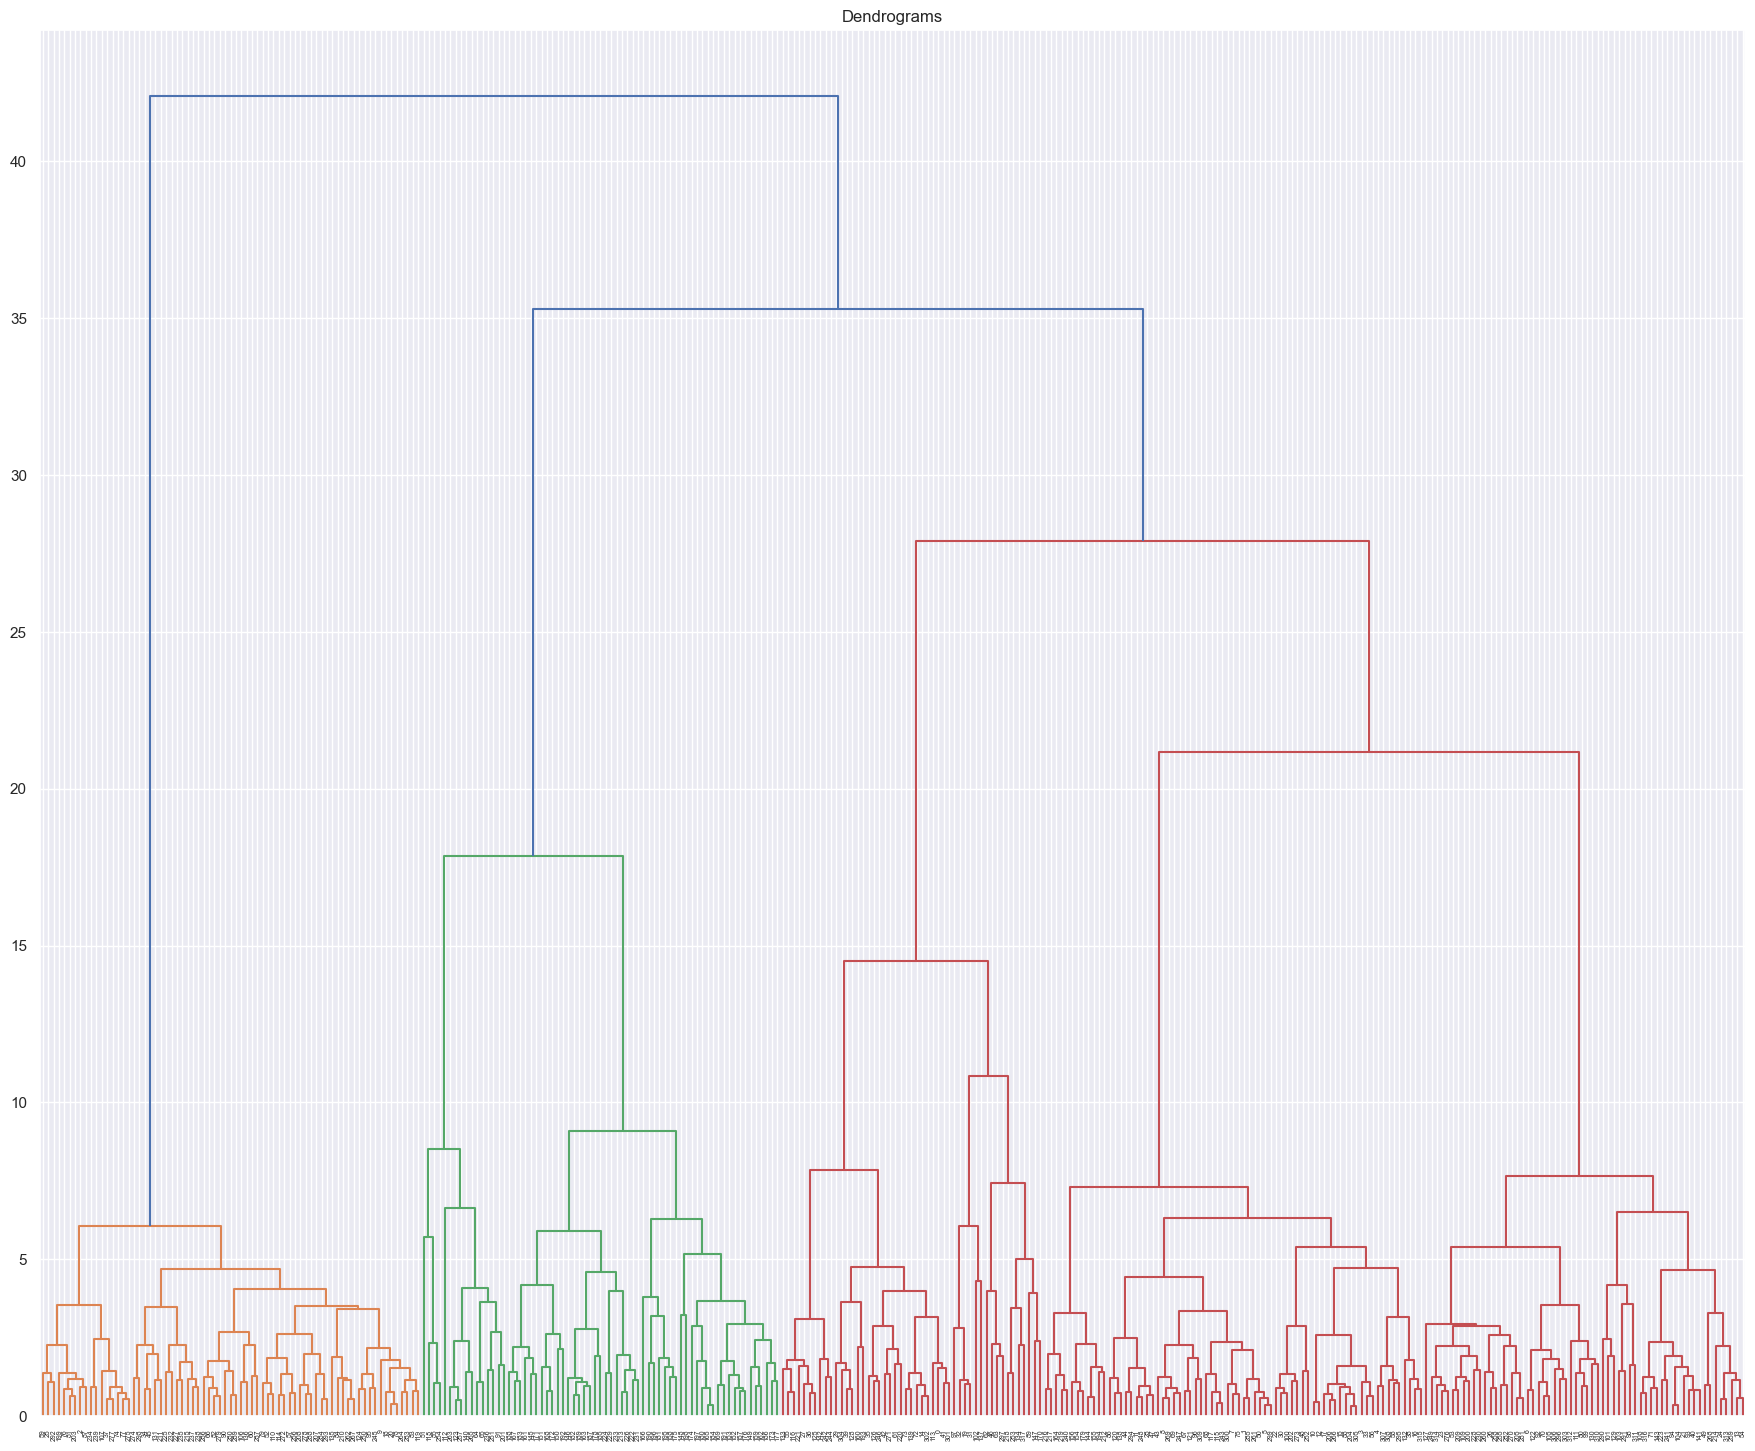

In [52]:
# Draw the first dendrogram for X (the full features data set)
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward')) # Use the default linkage algorithm 'ward'
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 37,5 and cut the dendrogram:

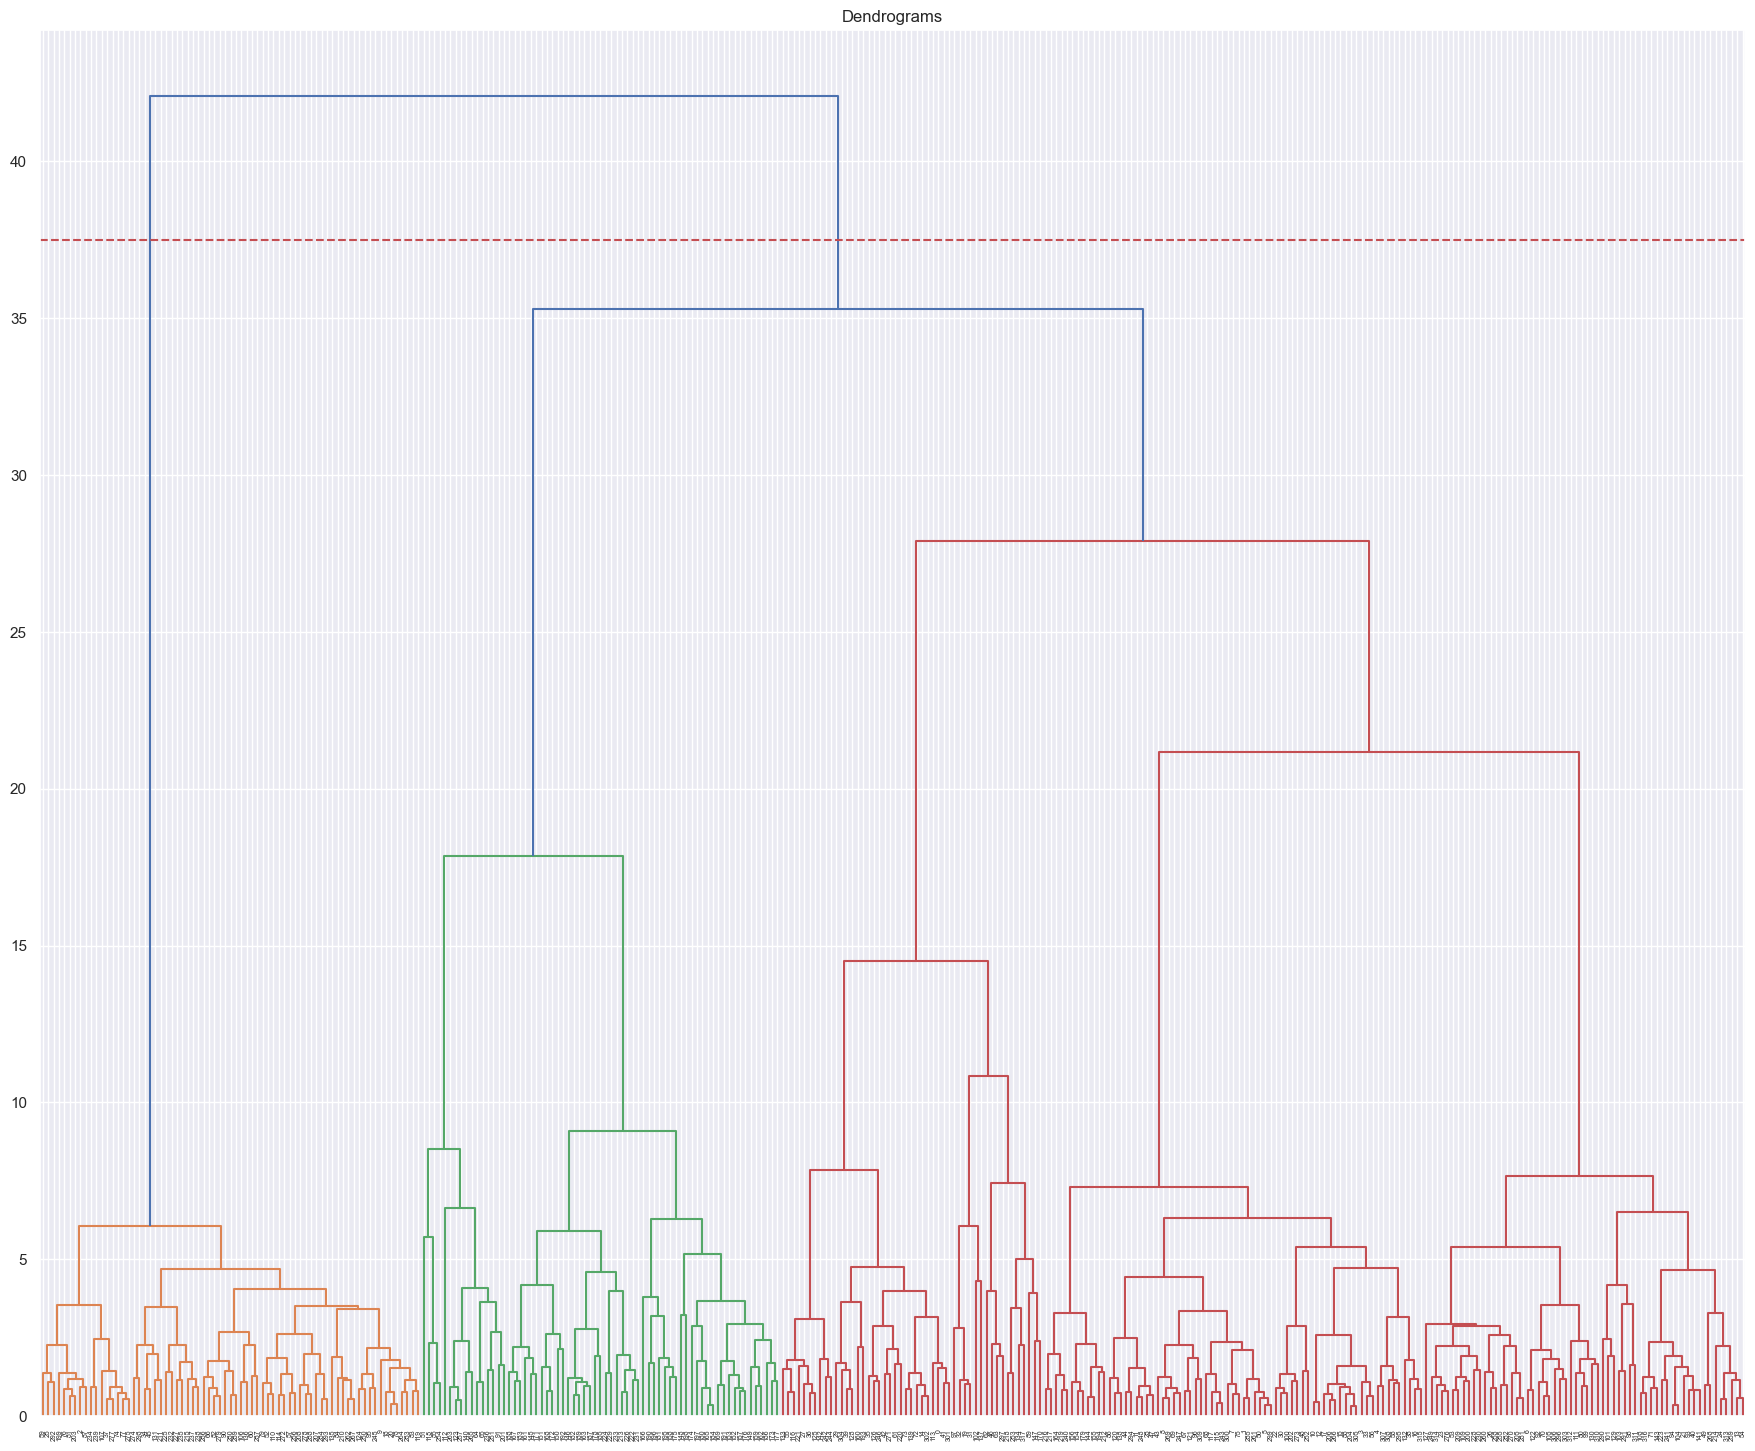

In [53]:
# Draw the second dendrogram for X (the full features data set) with a threshold of 110,000 and cut the dendrogram
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward')) # Use the default linkage algorithm 'ward'
plt.axhline(y=37.5, color='r', linestyle='--')
plt.show()

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters.

* Train the model on X (the full features) with the number of clusters = 2:

In [54]:
# Hierarchical clustering using the default linkage algorithm 'ward' on X (the full features)
hierachical_cluster1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # Use the default linkage algorithm 'ward'
hierachical_cluster1.fit(X)

AgglomerativeClustering(affinity='euclidean')

In [55]:
# Save the predicted cluster labels of X into a variable
pred1_cluster_labels_h = hierachical_cluster1.fit_predict(X)
pred1_cluster_labels_h

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [56]:
# Merge pred1_cluster_labels_h with our X full features data set
X['Cluster_h'] = pred1_cluster_labels_h

# View the first 5 rows of the X data set now with the cluster labels merged
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_k,Cluster_h
0,2.0,3.0,0.601703,1.311573,0.690419,-1.470955,0.828516,0.641018,5,0
1,2.0,3.0,0.167531,1.327836,0.918508,0.413627,0.955926,0.881540,2,0
2,1.0,3.0,0.635813,-0.835228,0.125643,1.567203,-0.188949,0.887260,6,1
3,2.0,3.0,0.381280,1.150942,0.313847,-0.456079,0.584634,0.709880,2,0
4,2.0,3.0,0.569198,0.176045,0.612261,-0.748840,0.926815,-0.121811,2,0


* Draw the dendrogram to help decide the number of clusters for X_selected (the selected features data set) ([Reference](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering)):

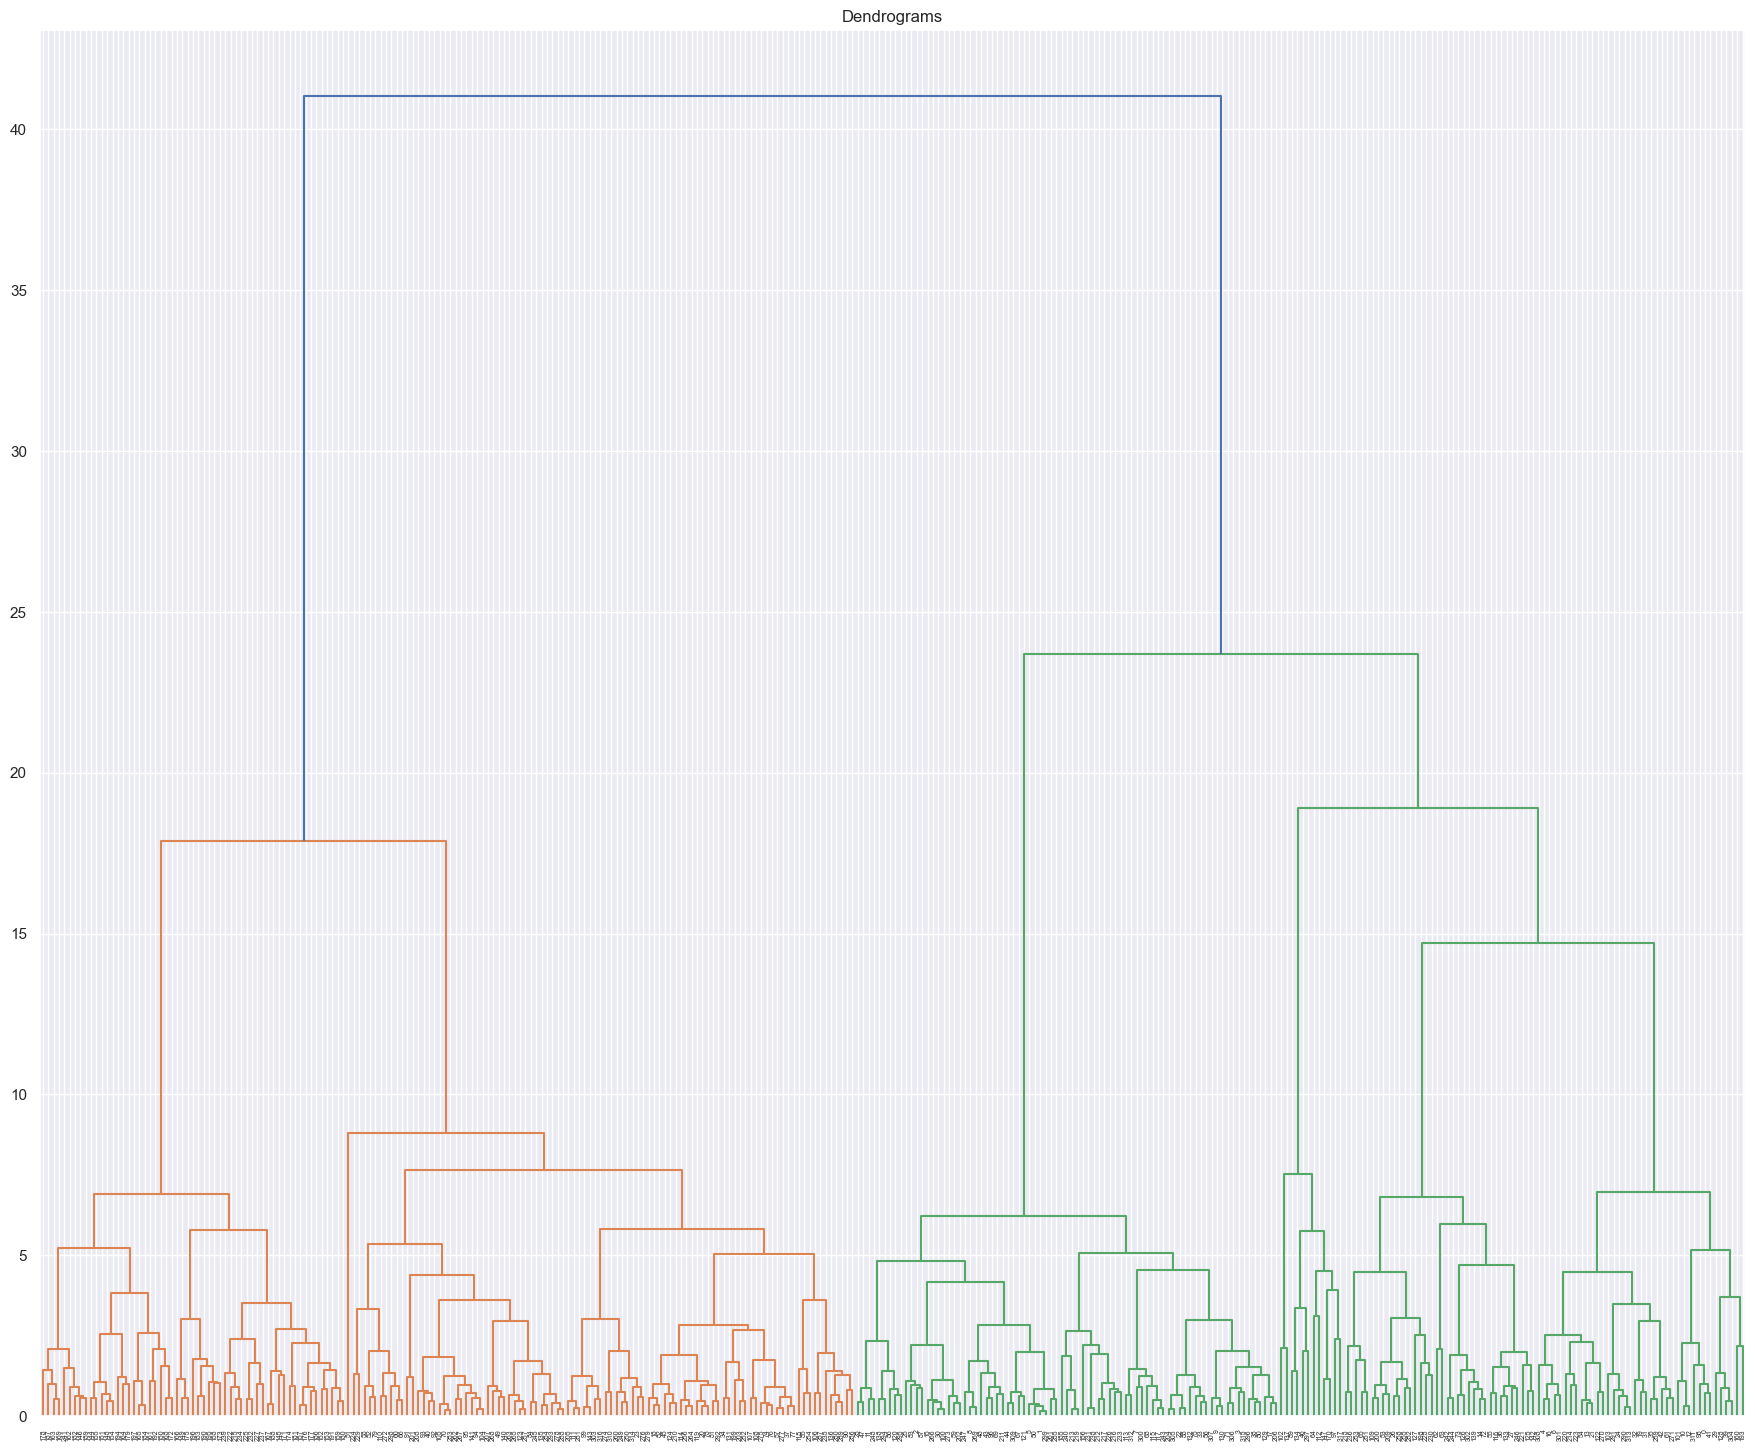

In [57]:
# Draw the first dendrogram for X_selected (the selected features data set)
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend2 = shc.dendrogram(shc.linkage(X_selected, method='ward')) # Use the default linkage algorithm 'ward'
plt.show()

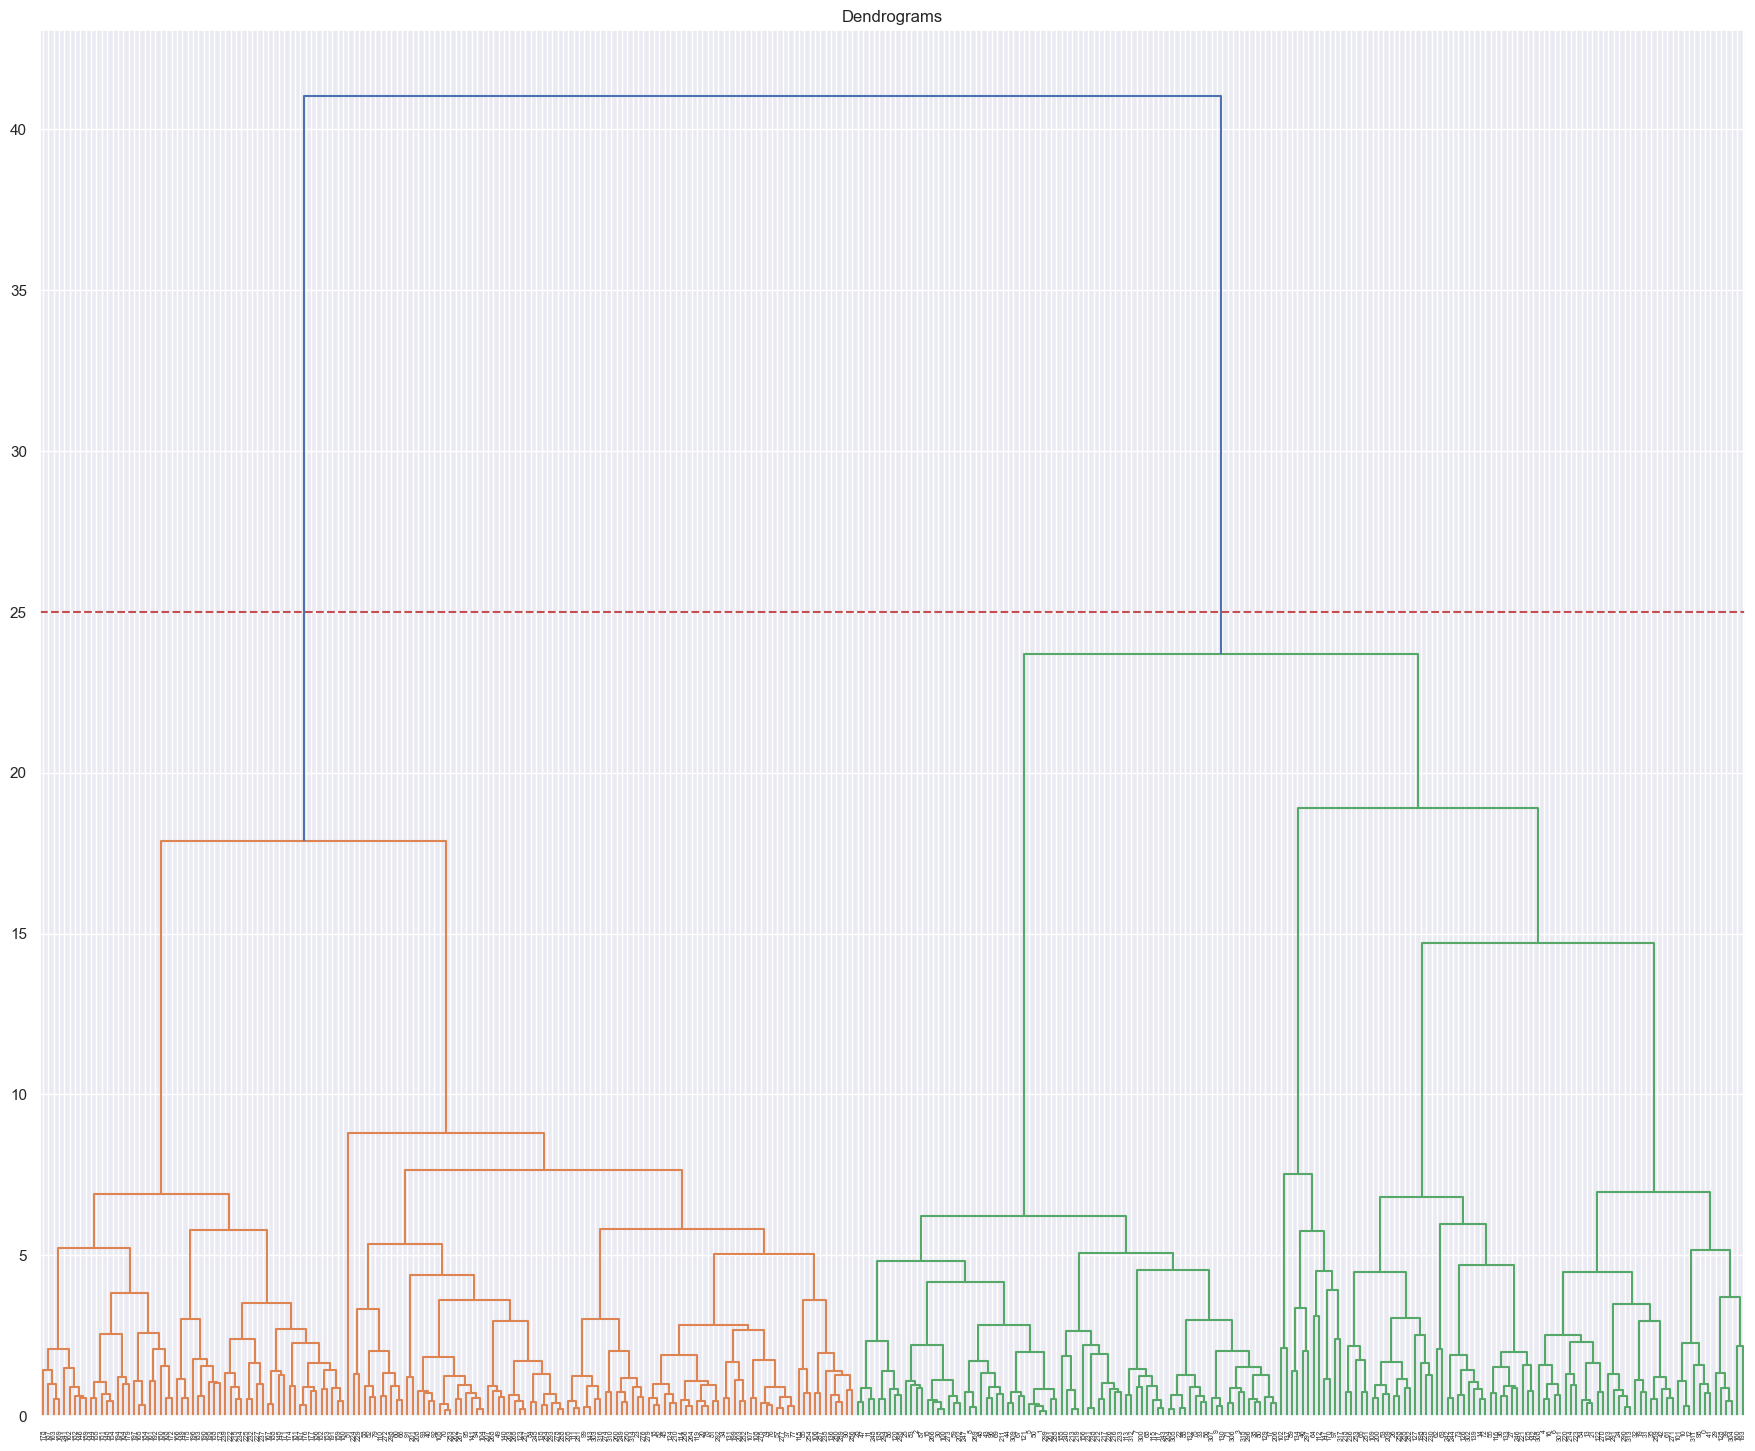

In [58]:
# Draw the second dendrogram for X_selected (the selected features data set) with a threshold of 25 and cut the dendrogram
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend2 = shc.dendrogram(shc.linkage(X_selected, method='ward')) # Use the default linkage algorithm 'ward'
plt.axhline(y=25, color='r', linestyle='--')
plt.show()

* Train the model on X_selected (the selected features data set) with the number of clusters = 2:

In [59]:
# Hierarchical clustering using the default linkage algorithm 'ward' on X_selected (the selected features data set)
hierachical_cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # Use the default linkage algorithm 'ward'
hierachical_cluster2.fit(X_selected)

AgglomerativeClustering(affinity='euclidean')

In [60]:
# Save the predicted cluster labels of X_selected into a variable
pred2_cluster_labels_h = hierachical_cluster2.fit_predict(X_selected)
pred2_cluster_labels_h

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [61]:
# Merge pred1_cluster_labels with our X_selected features data set
X_selected['Cluster_h'] = pred2_cluster_labels_h

# View the first 5 rows of the X_selected data set now with the cluster labels merged
X_selected.head()

,Region,Fresh,Grocery,Frozen,Delicassen,Cluster_k,Cluster_h
0,3.0,0.601703,0.690419,-1.470955,0.641018,3,0
1,3.0,0.167531,0.918508,0.413627,0.881540,1,0
2,3.0,0.635813,0.125643,1.567203,0.887260,1,0
3,3.0,0.381280,0.313847,-0.456079,0.709880,1,0
4,3.0,0.569198,0.612261,-0.748840,-0.121811,3,0


* Compare the prediction cluster labels of the 2 Hierarchical clustering models using the full features and some selected features:

In [62]:
# Use boolean comparison between cluster labels of customers from X and X_selected and sum up the True values.
(X['Cluster_h'] == X_selected['Cluster_h']).sum()

221

**Model conclusion**: Feature selection resulted in 221 customers being matched in the 2 Hierarchical clustering models, due to the differences in the dendograms and the cut-offs. The fact that 221 out of 318 customers (almost 70%) matched in their cluster assignments between the 2 hierarchical clustering models indicates a relatively high level of consistency, especially considering that different features were used. That 221 customers remain consistently clustered despite changes in features implies that these customers might exhibit strong patterns or behaviors that are captured across various feature sets. Alternatively, the features selected might still encapsulate the most dominant patterns in the data, even when some are excluded.

For K-means: There's a significant disparity between full and selected feature sets, with only 24 out of 318 clients being consistently grouped in both scenarios. For Hierarchical clustering: 221 out of 318 customers (almost 70%) were consistently clustered across models with different feature sets. The Hierarchical clustering method seems to be more stable or consistent when changing feature sets than the K-means clustering method. 

In terms of feature Sensitivity: The K-means model was significantly sensitive to feature selection, as evidenced by the vast difference in client clustering between the two runs. The Hierarchical clustering model was less sensitive, retaining a more substantial proportion of customers in the same clusters even when features changed, although the number of clusters is just 2 for Hierarchical clustering compared to 6-7 clusters optimal in the K-means models.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

------

PCA seems to take advantage of multicollinearity and combines the highly correlated variables into a set of uncorrelated variables. It is said to be able to effectively eliminate multicollinearity between features ([Source]: (https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b#:~:text=PCA%20(Principal%20Component%20Analysis)%20takes,effectively%20eliminate%20multicollinearity%20between%20features) As a result, we'll only apply PCA on X - the full features data set.

In [63]:
# Drop the cluster labels we added to X in the K-means and Hierachical Clustering parts
X = X.drop(columns=['Cluster_k', 'Cluster_h'])

* First, apply PCA keeping all components equal to the original number of dimensions and see how well PCA captures the variance of our data:

Eigenvalues:
[2.69863725 1.53599341 0.7208695  0.63450388 0.56658027 0.33817422
 0.22111254 0.09519178]

Variances (Percentage):
[39.62138235 22.5514497  10.58380337  9.31578366  8.31852944  4.96507265
  3.2463735   1.39760533]



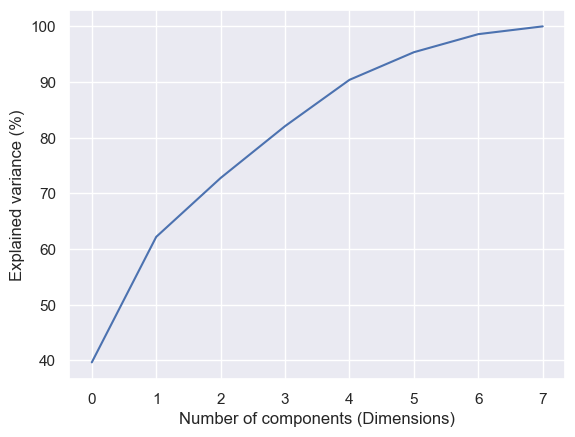

In [64]:
# Apply PCA on X - the full features data set
pca = PCA(n_components=None)
pca.fit(X)

# Get the eigenvalues
print('Eigenvalues:')
print(pca.explained_variance_)
print()

# Get explained variances
print('Variances (Percentage):')
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components (Dimensions)')
plt.ylabel('Explained variance (%)')
plt.show()

The first principal component accounts for approximately 39.61% of the variability in the data, the second one covers close to 22.55%, while the third one covers close to 10.58%. As we move further, the contribution of each component diminishes. Cumulatively, the initial 3 components encapsulate nearly 72.75% of the total variance in the data. The common practice is to choose a number of components such that a substantial percentage (often around 70-95%) of the variance is retaine. Given this significant coverage, our focus will be on retaining the initial 3 components.

"The importance of each feature is reflected by the magnitude of the corresponding values in the output — the higher magnitude, the higher the importance." ([Source](https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e)). However, note that we've applied the log transformation and the SttandardScaler to our data in the prep-processing. We can print out the features in descreasing order that contributes the most to each component.

In [65]:
# Take the abs of pca.components_
pca_components = abs(pca.components_)
print(pca_components)

[[0.19003513 0.06549245 0.12420872 0.52620877 0.5553759  0.22179653
  0.53712748 0.14536812]
 [0.02077648 0.0435711  0.61303839 0.13211712 0.05077374 0.51783547
  0.0153478  0.57743554]
 [0.03412241 0.34587104 0.00995327 0.04505587 0.14320692 0.63635249
  0.26544502 0.61738645]
 [0.02100515 0.06546951 0.77615931 0.02787996 0.08316006 0.41897662
  0.00167082 0.45783421]
 [0.05874861 0.92990868 0.02149156 0.01134895 0.02866827 0.30540148
  0.05544298 0.18455867]
 [0.11136274 0.0212443  0.06246239 0.78512602 0.0968337  0.06202139
  0.57727058 0.14268101]
 [0.14048233 0.0421592  0.03975987 0.28740048 0.80701336 0.06880504
  0.48815018 0.00348479]
 [0.96242459 0.05422544 0.01701475 0.06075672 0.00930724 0.01777591
  0.25727189 0.01504   ]]


In [66]:
# Features in the decreasing importance sequence in each component (8 components in total)
print('Features in importance sequence in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top values in each row
    temp = np.argpartition(-(pca_components[row]), 7)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:8]
    
    # print the top 4 feature names
    print(f'Component {row}: {X.columns[indices].to_list()}')

Features in importance sequence in each component
Component 0: ['Grocery', 'Detergents_Paper', 'Milk', 'Frozen', 'Channel', 'Delicassen', 'Fresh', 'Region']
Component 1: ['Fresh', 'Delicassen', 'Frozen', 'Milk', 'Grocery', 'Region', 'Channel', 'Detergents_Paper']
Component 2: ['Frozen', 'Delicassen', 'Region', 'Detergents_Paper', 'Grocery', 'Milk', 'Channel', 'Fresh']
Component 3: ['Fresh', 'Delicassen', 'Frozen', 'Grocery', 'Region', 'Milk', 'Channel', 'Detergents_Paper']
Component 4: ['Region', 'Frozen', 'Delicassen', 'Channel', 'Detergents_Paper', 'Grocery', 'Fresh', 'Milk']
Component 5: ['Milk', 'Detergents_Paper', 'Delicassen', 'Channel', 'Grocery', 'Fresh', 'Frozen', 'Region']
Component 6: ['Grocery', 'Detergents_Paper', 'Milk', 'Channel', 'Frozen', 'Region', 'Fresh', 'Delicassen']
Component 7: ['Channel', 'Detergents_Paper', 'Milk', 'Region', 'Frozen', 'Fresh', 'Delicassen', 'Grocery']


* Run PCA again with 3 components with n_components=3:

In [67]:
# Apply PCA again with n_components=2
pca2 = PCA(n_components=3)
X_pca = pca2.fit_transform(X)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2
0,-2.030797,-0.194328,-1.087275
1,-1.905364,-1.058639,0.035028
2,0.791369,-1.581997,0.211890
3,-1.418429,-0.580418,-0.607678
4,-1.175647,0.044628,-0.192733


In [68]:
# View the number of columns and rows of the transformed data X_pca
X_pca.shape

(318, 3)

In [69]:
# Review the cleaned up dataset with full features
X.shape

(318, 8)

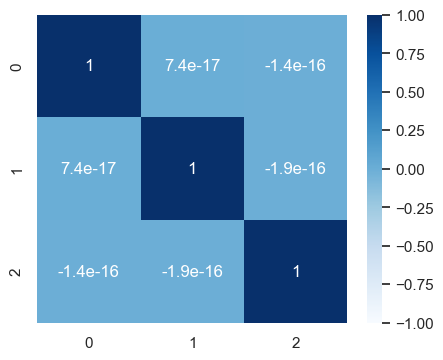

In [70]:
# Use a correlation matrix heatmap to check the relationship between the different variables in the PCA transformed version of X
plt.figure(figsize=(5, 4))
heatmap_pca = sns.heatmap(X_pca.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()

**Model conclusion**: We have used PCA to reduce the dimensions of X data set that has full features, while preserving as much information as possible. The data transformed by PCA only has 3 components whilst capturing 72.75% of the total variance in the data.

Here are the differences between the two datasets.

* The cleaned up dataset has 8 features while the PCA transformed dataset has 2 components.
* The PCA transformed dataset aptures about 72.75% variability in the original cleaned dataset.
* The corresponding values of the two datasets (the cleaned and transformed dataset X with full features vs. the ones created by PCA) are completely different.
* We know some variables in the original cleaned dataset X are highly correlated with one or more of the other variables (multicollinearity). The correlation between each pair of components in the transformed dataset is now very small and insignificant.

Using PCA on the wholesaler dataset calculates the dimensions which best maximize variance, we are able to find which compound combinations of features best describe customers. As found above:

Component 0: ['Grocery', 'Detergents_Paper', 'Milk', 'Frozen', 'Channel', 'Delicassen', 'Fresh', 'Region'], Component 1: ['Fresh', 'Delicassen', 'Frozen', 'Milk', 'Grocery', 'Region', 'Channel', 'Detergents_Paper'], Component 3: ['Fresh', 'Delicassen', 'Frozen', 'Grocery', 'Region', 'Milk', 'Channel', 'Detergents_Paper'].

PCA did handle well multicollinearity among the highly correlated original variables, and keep a pretty good chunk of information (72.75%). However, this is a very small dataset of only 318 rows and 8 columns after cleaning. We might not need to use PCA to avoid the intepretability issues that come with PCA. 

After all, 'Fresh', 'Grocery' and 'Milk' together account for the majority of wholesale customers' annual spending as seen on the Feature Selection section in Part 1. Since the'Grocery' and 'Milk' product categories show a correlation of 0.74, PCA is an option for not having to remove 'Milk' due to multicollinearity in the top 3 features.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

-------

The "Wholesale Data" dataset that refers to clients of a wholesale distributor, and includes the annual spending in monetary units (m.u.) on diverse product categories.

**Conclusion from the exploratory data analysis (EDA) conducted**:

* Channel wise, the majority of the wholesaler's clients belong to the Horeca (Hotel/Restaurant/Café) channel, and significantly less common in Tthe Retail channel. Around 68% of the customers of this wholesaler are from Horeca places, whereas only 32% are Retail customers.

* Region wise, the biggest chunk of clients of the wholesaler are aggregated into the massive 'Other Region' category which doesn't explain well statiscally when compared with aggregation. 72% the customer base of this wholesaler are densely located there. No further details about which cities/locations contribute to 'Other Region', while 'Lisnon', 'Oporto' seems to be the largest cities/regions respectively in our studied country. Removing 'Other Region', Lisnon has far more clients than in  Oporto. Horeca customers are more present in Lisnon than in Operto.

* The wholesaler should consider re-categorizing their client region segmentation to separate more significant cities/regions out of 'Other Region'. This will positively allow better insights into the regions and channels mapping, instead of having a big chunk of density amalgamation in 'Other Region' for both Region and Channel.

* Product Category wise, there are 5 product categories with their annual spending per customer across: 'Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen'. The distributions of those categories reveals that the annual spending of those the majority of customers in our dataset have low to moderate spending. There are also a few outliers in such columns which represents a few clients who spend a lot. 

* In terms of spending patterns, nearly 68% of customers are from Horeca, their average annual spend for all categories is just $26,844 (assuming the spend is in dollars). Retail customers accounts for only 32% of the total number of customers, yet their average yearly spend is $46,619. Retail customers tend to spend more on Milk, Groceries and Detergents_paper than those fromHoreca customers. Both channels see similar overall spending patterns for the rest of the categories, despite Horeca customers slightly spend more on Fresh produce and Frozen products.

**Conclusion from the the unsupervised machine learning models developed conducted**:

* Our goal of this project is to perform unsupervised learning techniques to find patterns in the product selling, the customers spending behavior from a wholesale distributor. The end goal might be trying to increase spending based on the hidden patterns in our dataset. We tried KMeans clustering, Hierarchical clustering, and PCA algorithms. We also tried to compare the impacts of these models on 2 subsets of our data in the K-means and Hierarchical clustering models - one with all attributes and one with a selected combination of attributes. Due to PCA being so powerful in dimensional reduction and feature selection, the algorithm doesn't require repeating the algorithm to different subsets of the data.

* K-means neighboring are able to segment the clients data into an optimal number of 6 or 7 clusters of clients, depending on whether we perform feature selection or not. There is a certain degree of difference in the customers cluster groups. When we removed the 'Channel' characteristic and the annual spending of the 'Detergents_Paper' and 'Milk' product categories, it leads to only 24 clients clustering into groups in commonality between the 2 combinations of features. This might be an indicator of an okay quality of segmented customer groups, but rather show some unstability depends on different attributes combinations of customers.

* Hierarchical clustering provides 2 clusters of customers based on the categorical and spending inputs. There are variances in the customers cluster groups if we try 2 different combinations of the attributes, which has 221 clients (almost 70% of the clean and transformed data) being listed matchingly in the 2 trials. It is less varied than the matched commonality betwen running K-means with these 2 subsets (with 24 clustered client matching). This Hierachical Clustering algorithm shows a less sensitivity to changing up the customer segmentation subsets, compared to K-means in this case. However, we have 6-7 clusters of customer groups in the K-means models compared to only 2 in Hierarchical clustering.

* PCA is more powerful in the underlying structure of the wholesale customer data and finding the compound combinations of features best describe customers. It transformed the original data we have from having 8 columns down to only 3 top components that retains 72.75% of the original information. The top best combination include ['Grocery', 'Detergents_Paper', 'Milk', 'Frozen', 'Channel', 'Delicassen', 'Fresh', 'Region']
; then ['Fresh', 'Delicassen', 'Frozen', 'Milk', 'Grocery', 'Region', 'Channel', 'Detergents_Paper'], and lastly ['Frozen', 'Delicassen', 'Region', 'Detergents_Paper', 'Grocery', 'Milk', 'Channel', 'Fresh']. However, the transformed data by PCA can be hard to intepret and communicate to business users, as it's inexplicitly hard to explain on why we choose those combination in layman's terms.
